In [1]:
from bs4 import BeautifulSoup
import requests

import pandas as pd

In [2]:
url = 'https://www.billboard.com/charts/decade-end/hot-100/'

In [3]:
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
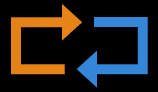

In [5]:
print(soup.prettify())

In [6]:
chart = soup.find_all('div', class_='chart-results // lrv-a-wrapper lrv-u-padding-lr-00@mobile-max')

In [17]:
chart_positions = []
peak_positions = []
titles = []
artists = []
peak_date=[]

for item in soup.select('li', class_='class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 lrv-u-border-color-grey-light lrv-u-padding-l-2 lrv-u-padding-r-1 lrv-u-padding-l-1@mobile-max u-border-b-0@mobile-max"'):
    
    chart_position_element = item.find('span', class_='c-label  a-font-primary-bold-l u-font-size-32@tablet u-letter-spacing-0080@tablet')
    chart_position_text = chart_position_element.text if chart_position_element else 'N/A'
    chart_positions.append({'chart_position': chart_position_text})
    
    title_element = item.find('h3', id= 'title-of-a-story', class_='c-title  a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max u-letter-spacing-0028@tablet')
    title_text = title_element.text if title_element else 'N/A'
    titles.append({'title': title_text})
    
    artist_element = item.find('span', class_='c-label  a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block u-font-size-20@tablet')
    artist_text = artist_element.text if artist_element else 'N/A'
    artists.append({'artist': artist_text})

for item in soup.select('li', class_='lrv-u-width-100p u-hidden@tablet'):

    
    peak_position_element = item.find('span', class_='c-label  a-font-primary-medium-l lrv-u-font-size-14@mobile-max')
    peak_position_text = peak_position_element.text if peak_position_element else 'N/A'
    peak_positions.append({'peak_position': peak_position_text})
    
    peak_date_element = item.find('span', class_= 'c-label  a-font-primary-medium-l lrv-u-font-size-14@mobile-max')
    peak_date_text = peak_date_element.text if peak_date_element else 'N/A'
    peak_date.append({'genre': peak_date_text})


# Create DataFrames from the lists
chart_positions_df = pd.DataFrame(chart_positions)
titles_df = pd.DataFrame(titles)
artists_df = pd.DataFrame(artists)
peak_positions_df = pd.DataFrame(peak_positions)
peak_date_df = pd.DataFrame(peak_date)

# Merge the DataFrames on their index
chart = pd.concat([chart_positions_df, titles_df, artists_df, peak_positions_df,peak_date_df], axis=1)

In [18]:
chart

,chart_position,title,artist,peak_position,genre
0,N/A,N/A,N/A,N/A,N/A
1,N/A,N/A,N/A,N/A,N/A
2,N/A,N/A,N/A,N/A,N/A
3,N/A,N/A,N/A,N/A,N/A
4,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...
1068,N/A,N/A,N/A,N/A,N/A
1069,N/A,N/A,N/A,N/A,N/A
1070,N/A,N/A,N/A,N/A,N/A
1071,N/A,N/A,N/A,N/A,N/A


In [20]:
url = 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2010s'
response = requests.get(url)
response.status_code # 200 status code means OK!
soup = BeautifulSoup(response.content, "html.parser")
print(soup.prettify())
chart = soup.find_all('div', class_='chart-results // lrv-a-wrapper lrv-u-padding-lr-00@mobile-max')

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Billboard Hot 100 number-one singles of the 2010s - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature

In [19]:
# chart_positions = []
# peak_positions = []
# titles = []
# artists = []
# peak_date=[]

# for item in soup.select('table', class_='wikitable'):
    
#     chart_position_element = item.find('span', class_='c-label  a-font-primary-bold-l u-font-size-32@tablet u-letter-spacing-0080@tablet')
#     chart_position_text = chart_position_element.text if chart_position_element else 'N/A'
#     chart_positions.append({'chart_position': chart_position_text})
    
#     title_element = item.find('h3', id= 'title-of-a-story', class_='c-title  a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max u-letter-spacing-0028@tablet')
#     title_text = title_element.text if title_element else 'N/A'
#     titles.append({'title': title_text})
    
#     artist_element = item.find('span', class_='c-label  a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block u-font-size-20@tablet')
#     artist_text = artist_element.text if artist_element else 'N/A'
#     artists.append({'artist': artist_text})

# for item in soup.select('li', class_='lrv-u-width-100p u-hidden@tablet'):

    
#     peak_position_element = item.find('span', class_='c-label  a-font-primary-medium-l lrv-u-font-size-14@mobile-max')
#     peak_position_text = peak_position_element.text if peak_position_element else 'N/A'
#     peak_positions.append({'peak_position': peak_position_text})
    
#     peak_date_element = item.find('span', class_= 'c-label  a-font-primary-medium-l lrv-u-font-size-14@mobile-max')
#     peak_date_text = peak_date_element.text if peak_date_element else 'N/A'
#     peak_date.append({'genre': peak_date_text})


# # Create DataFrames from the lists
# chart_positions_df = pd.DataFrame(chart_positions)
# titles_df = pd.DataFrame(titles)
# artists_df = pd.DataFrame(artists)
# peak_positions_df = pd.DataFrame(peak_positions)
# peak_date_df = pd.DataFrame(peak_date)

# # Merge the DataFrames on their index
# chart = pd.concat([chart_positions_df, titles_df, artists_df, peak_positions_df,peak_date_df], axis=1)

IndexError: list index out of range

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2010s'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Lists to store data
top_positions = []
dates = []
artists = []
titles = []
weeks_at_number_one_list = []

# Finding the table containing the information
table = soup.find('table', {'class': 'wikitable'})

# Loop through rows in the table
for row in table.find_all('tr')[1:]:  # Start from the second row to skip the header
    columns = row.find_all(['td', 'th'])
    
    # Check if there are enough columns
    if len(columns) >= 5:
        # Extract data from columns
        top_position = columns[0].text.strip()
        date = columns[1].text.strip()
        
        # Check if the third column has an <a> tag
        artist_element = columns[2].find('a')
        artist_name = artist_element.text.strip() if artist_element else 'N/A'
        
        # Check if the fourth column has an <a> tag
        title_element = columns[3].find('a')
        title = title_element.text.strip() if title_element else 'N/A'
        
        weeks_at_number_one = columns[4].text.strip()
        
        # Append data to lists
        top_positions.append(top_position)
        dates.append(date)
        artists.append(artist_name)
        titles.append(title)
        weeks_at_number_one_list.append(weeks_at_number_one)

# Create DataFrame
df = pd.DataFrame({
    'Top Position': top_positions,
    'Date': dates,
    'Artist': artists,
    'Title': titles,
    'Weeks at Number One': weeks_at_number_one_list
})


In [25]:
df

,Top Position,Date,Artist,Title,Weeks at Number One
0,980,"January 2, 2010",Kesha,Tik Tok,9
1,981,"March 6, 2010",The Black Eyed Peas,Imma Be,2
2,982,"March 20, 2010",Taio Cruz,Break Your Heart,1
3,983,"March 27, 2010",Rihanna,Rude Boy,5
4,984,"May 1, 2010",B.o.B,Nothin' on You,2
...,...,...,...,...,...
111,1091,"November 2, 2019",Lewis Capaldi,Someone You Loved,3
112,1092,"November 9, 2019",Selena Gomez,Lose You to Love Me,1
113,1093,"November 30, 2019",N/A,Circles,3
114,1094,"December 14, 2019",N/A,Heartless,1
